# Simulated Annealing and GSA for Feature Selection
## Simulated Annealing Algorithm) For Feature Selection on Churn Prediction
___

In [7]:
import sys
import os

# Get the directory of the current script or notebook
script_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct the full path to the 'src' directory
src_dir = os.path.join(script_dir, '..', 'src')

# Append the 'src' directory to sys.path
sys.path.append(src_dir)

# Construct the full path to the 'data' directory
data_dir = os.path.join(script_dir, '..', 'data')

# Now, you can import the modules and access the data
from main import simulated_annealing
from GSA_implementation import GSA
from benchmarks import F1 
from gsa_sa_iterative import gsa_sa_iterative
from generate_neighbor import generate_neighbor
from utils import fitness_function, train_model


# Load your data (example)
import pandas as pd

#dataset1
#df = pd.read_csv(os.path.join(data_dir, 'churn2.csv'))

#dataset2
#df = pd.read_csv(os.path.join(data_dir, 'ChurnNormalize.csv'))

#dataset3
df = pd.read_csv(os.path.join(data_dir, 'cell2celltrain.csv'))
df2 = pd.read_csv(os.path.join(data_dir, 'cell2cellholdout.csv'))




In [11]:
df.head(10)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [10]:
df2.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [12]:


# What is the size of the data?
df.shape



(51047, 58)

# Exploratory Data Analysis

In [18]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Does the dataset contain any duplicated rows?
df.duplicated().sum()

0

In [24]:
df = df.drop(['CustomerID'], axis=1)

In [25]:


# Some statistics about the dependent variable
df['Churn'].describe()



count    51047.000000
mean         0.288185
std          0.452922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

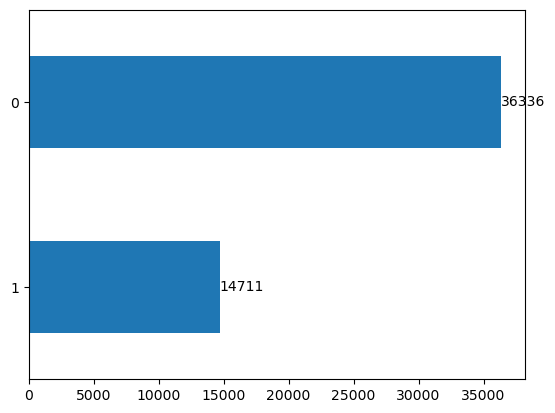

In [26]:
# What is the distribution of the dependent variable
value_counts_churn = df['Churn'].value_counts(dropna = False).sort_values()

ax = value_counts_churn.plot(kind = 'barh')
ax.bar_label(ax.containers[0]);

In [27]:
# Convert the values of the target to comply with Machine Learning models requirements
df['Churn'] = df['Churn'].replace(to_replace = ['Yes', 'No'], value = [1, 0])

value_counts_churn = df['Churn'].value_counts(dropna = False).sort_values()
value_counts_churn

1    14711
0    36336
Name: Churn, dtype: int64

In [28]:
list_cat_features_with_numbers = ['IncomeGroup']

list_num_features = [column for column in df.drop(['Churn'], axis = 1).select_dtypes(include = 'number').columns if (column not in list_cat_features_with_numbers)]
list_cat_features = list(df.drop(['Churn'], axis = 1).columns.difference(list_num_features))

print(list_num_features, ", count =", len(list_num_features))
print("\n")
print(list_cat_features, ", count =", len(list_cat_features))

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating'] , count = 33


['BuysViaMailOrder', 'ChildrenInHH', 'CreditRating', 'HandsetPrice', 'HandsetRefurbished', 'HandsetWebCapable', 'HasCreditCard', 'Homeownership', 'IncomeGroup', 'MadeCallToRetentionTeam', 'MaritalStatus', 'NewCellphoneUser', 'NonUSTravel', 'NotNewCellphoneUser', 'Occupation', 'OptOutMailings', 'OwnsComputer', 'OwnsMotorcycle', 'PrizmCode', 'RVOwner', 'R

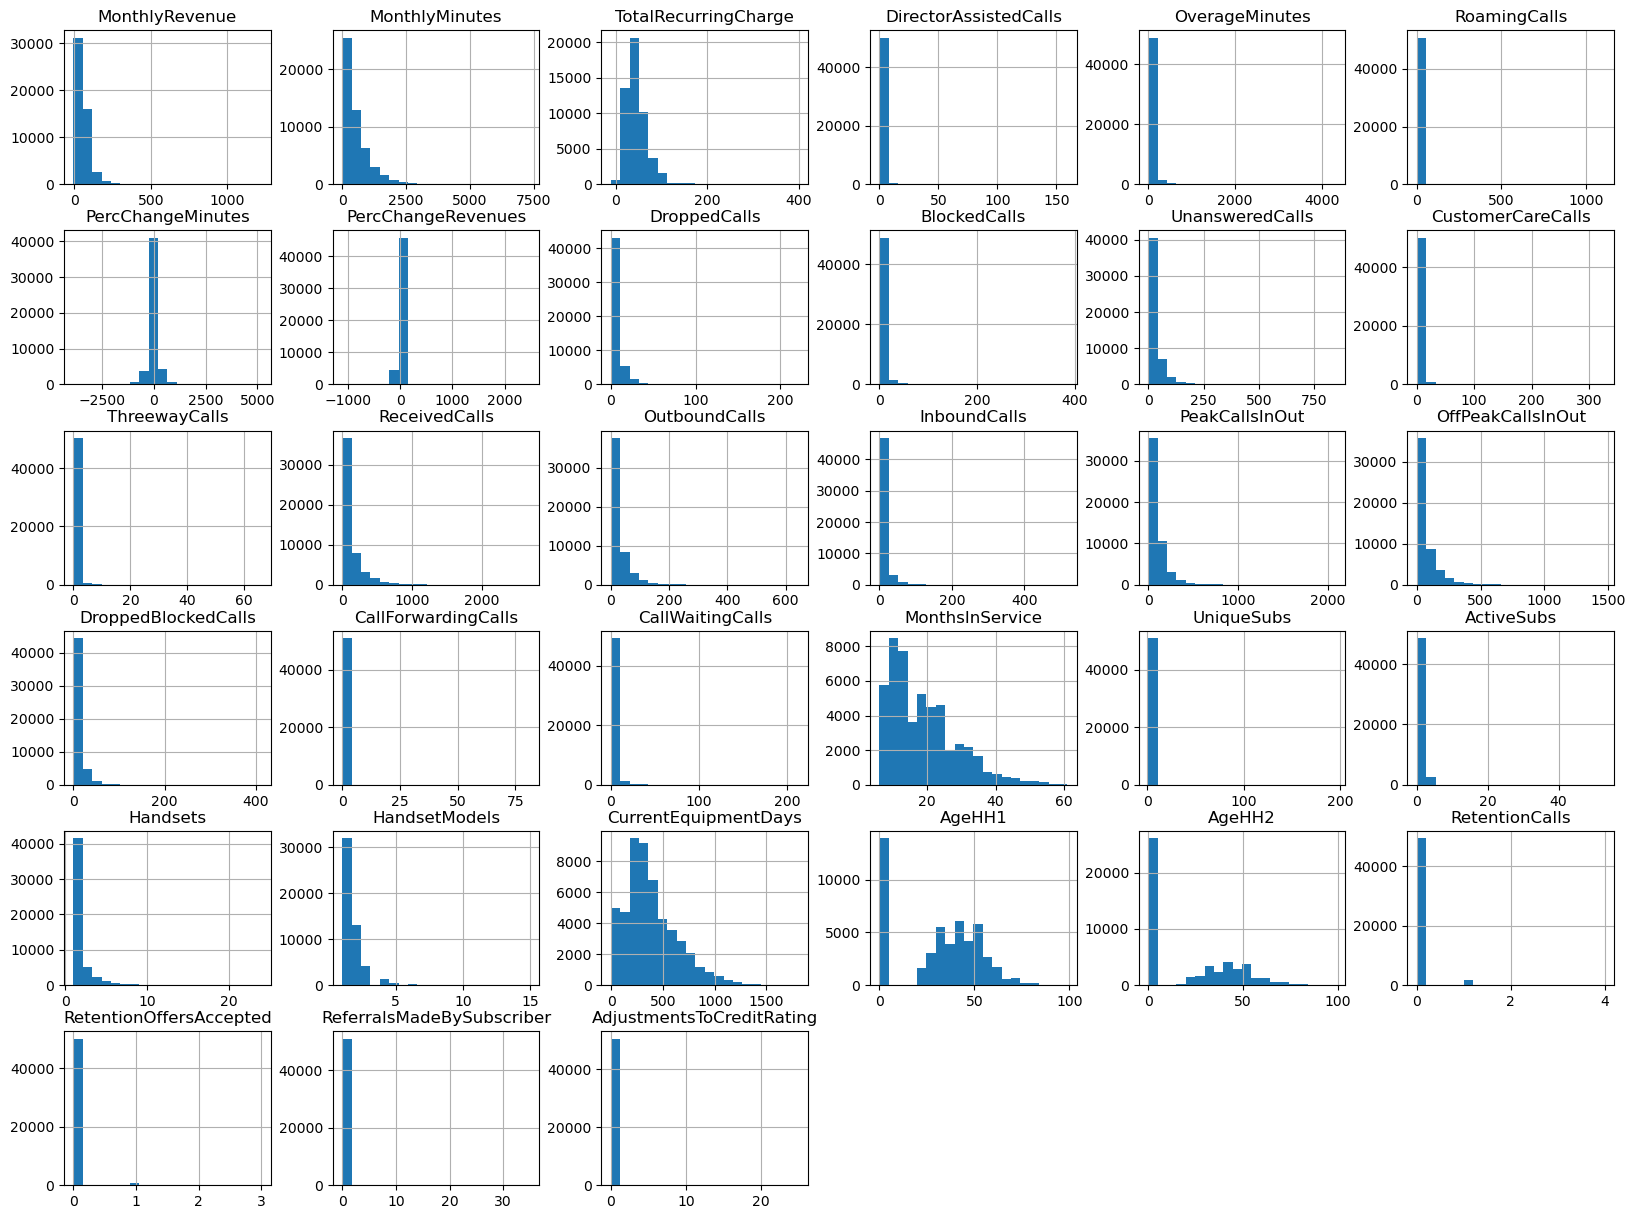

In [29]:


# What are the distributions of the numerical features in the dataset?
df[list_num_features].hist(bins = 20, figsize = (20, 15));



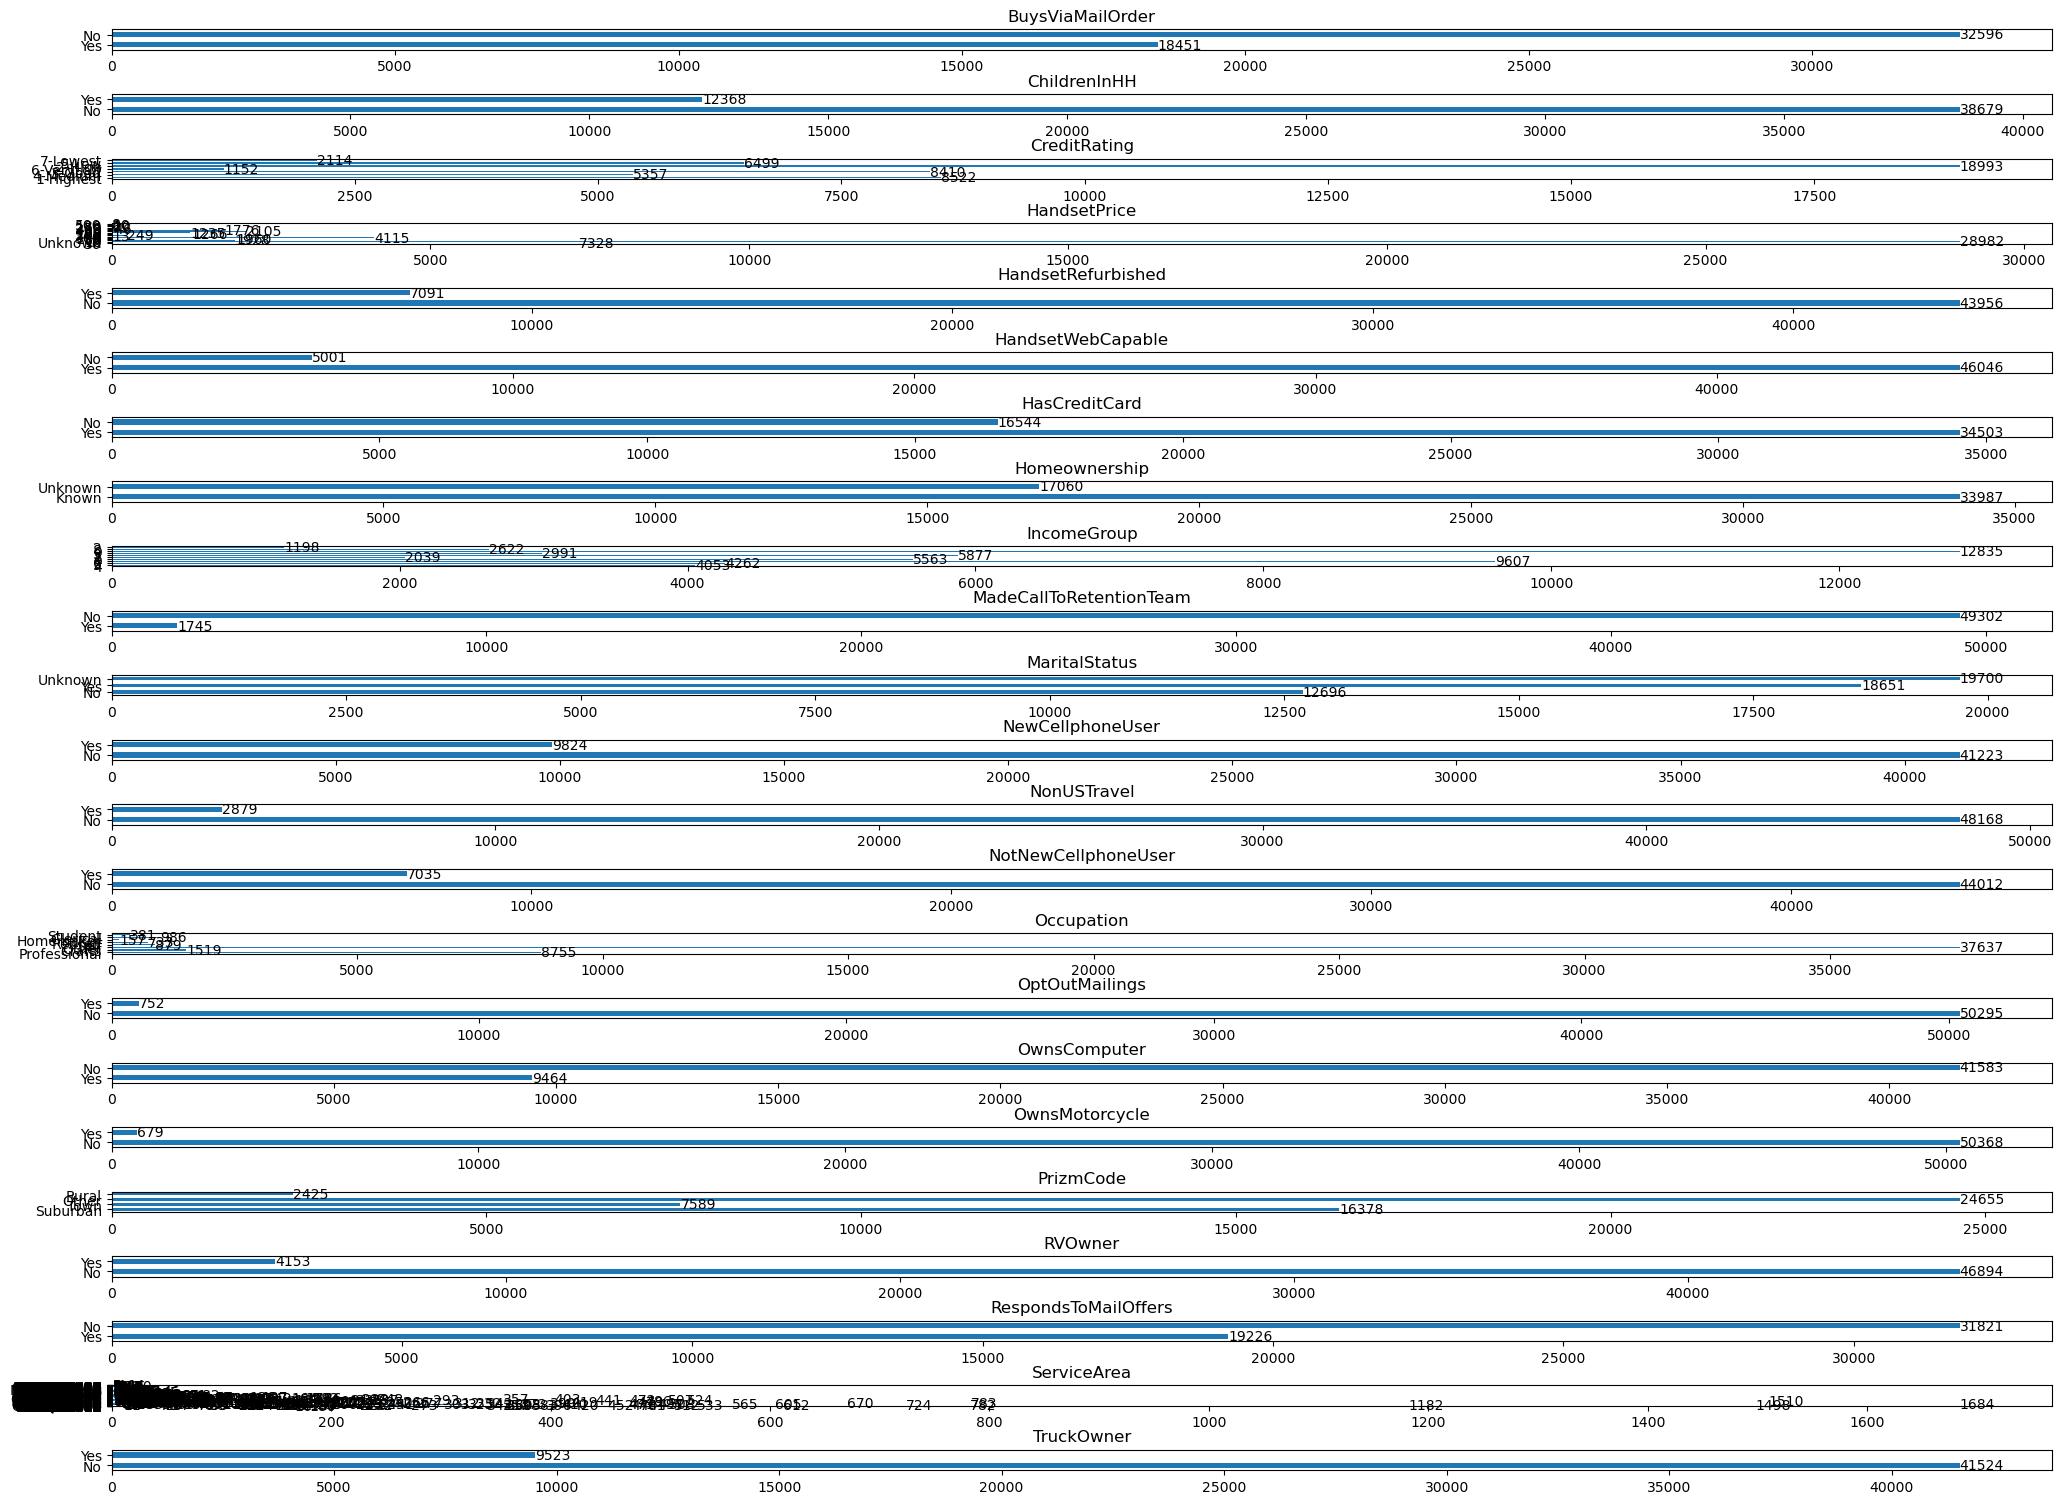

In [30]:


# What are the frequencies of each category of the categorical features in the dataset?

fig, axes = plt.subplots(nrows = 23, ncols = 1, figsize = (20, 15)) # 23 plots in total
fig.tight_layout()

for i, column in enumerate(list_cat_features):
    ax = df[column].value_counts(dropna = False, sort = False).plot(kind = 'barh', title = column, ax = axes[i])
    ax.bar_label(ax.containers[0]);





ServiceArea seems to contain too many different values for a categorical variable, it might be a good idea to group them or even drop this column if we cannot reduce its number of categories.


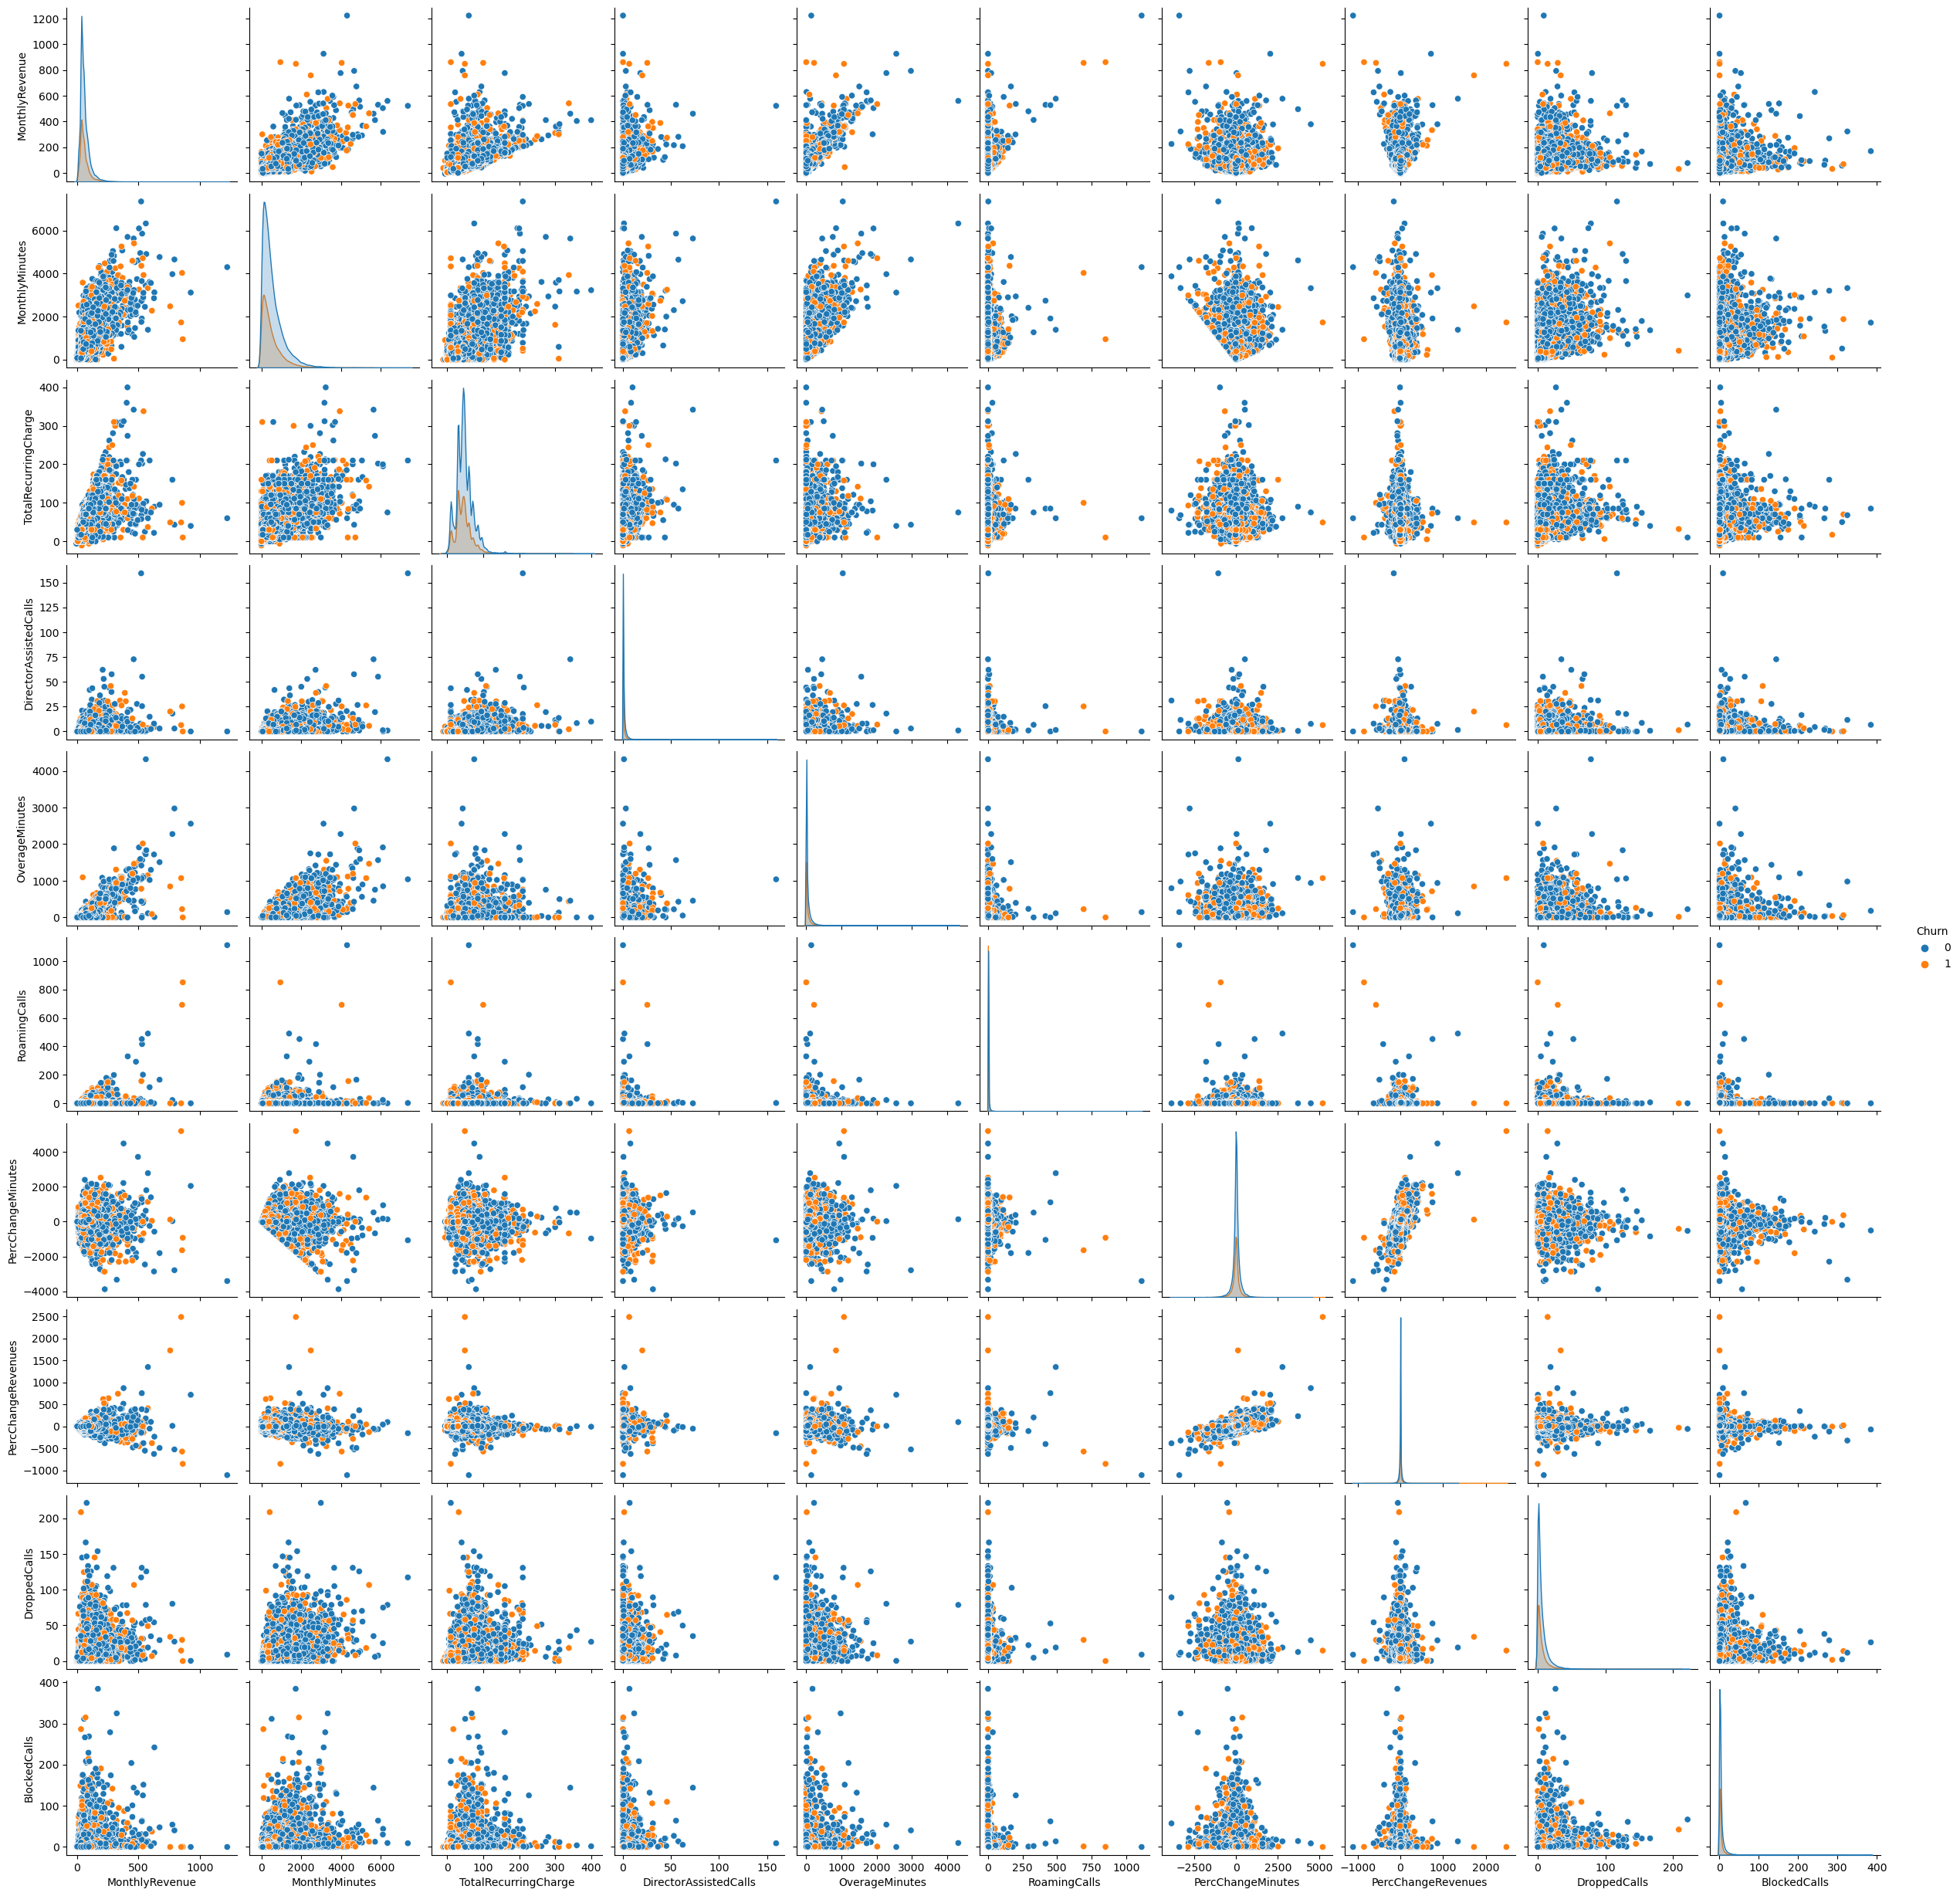

In [32]:
# Are the class of the target variable 'Churn' linearly separable?
sns.pairplot(df.iloc[:, :11], hue = 'Churn');



In 2D, the class are not linearly separable, we will then maybe need complex models to solve this problem.


# Data Cleaning

In [33]:
# How many missing data we have in our dataset?
dict(df.drop(['Churn'], axis = 1).isna().sum())

{'MonthlyRevenue': 156,
 'MonthlyMinutes': 156,
 'TotalRecurringCharge': 156,
 'DirectorAssistedCalls': 156,
 'OverageMinutes': 156,
 'RoamingCalls': 156,
 'PercChangeMinutes': 367,
 'PercChangeRevenues': 367,
 'DroppedCalls': 0,
 'BlockedCalls': 0,
 'UnansweredCalls': 0,
 'CustomerCareCalls': 0,
 'ThreewayCalls': 0,
 'ReceivedCalls': 0,
 'OutboundCalls': 0,
 'InboundCalls': 0,
 'PeakCallsInOut': 0,
 'OffPeakCallsInOut': 0,
 'DroppedBlockedCalls': 0,
 'CallForwardingCalls': 0,
 'CallWaitingCalls': 0,
 'MonthsInService': 0,
 'UniqueSubs': 0,
 'ActiveSubs': 0,
 'ServiceArea': 24,
 'Handsets': 1,
 'HandsetModels': 1,
 'CurrentEquipmentDays': 1,
 'AgeHH1': 909,
 'AgeHH2': 909,
 'ChildrenInHH': 0,
 'HandsetRefurbished': 0,
 'HandsetWebCapable': 0,
 'TruckOwner': 0,
 'RVOwner': 0,
 'Homeownership': 0,
 'BuysViaMailOrder': 0,
 'RespondsToMailOffers': 0,
 'OptOutMailings': 0,
 'NonUSTravel': 0,
 'OwnsComputer': 0,
 'HasCreditCard': 0,
 'RetentionCalls': 0,
 'RetentionOffersAccepted': 0,
 'NewC



The features with the most missing entries are AgeHH1, AgeHH2, PercChangeMinutes and PercChangeRevenues and account for less than 2% of the data.


In [35]:
### Data cleaning ###

df['MonthlyRevenue'] = df['MonthlyRevenue'].fillna(df['MonthlyRevenue'].median())
df['MonthlyMinutes'] = df['MonthlyMinutes'].fillna(df['MonthlyMinutes'].median())
df['TotalRecurringCharge'] = df['TotalRecurringCharge'].fillna(df['TotalRecurringCharge'].median())
df['DirectorAssistedCalls'] = df['DirectorAssistedCalls'].fillna(df['DirectorAssistedCalls'].median())
df['OverageMinutes'] = df['OverageMinutes'].fillna(df['OverageMinutes'].median())
df['RoamingCalls'] = df['RoamingCalls'].fillna(df['RoamingCalls'].median())
df['PercChangeMinutes'] = df['PercChangeMinutes'].fillna(df['PercChangeMinutes'].median())
df['PercChangeRevenues'] = df['PercChangeRevenues'].fillna(df['PercChangeRevenues'].median())
df['AgeHH1'] = df['AgeHH1'].fillna(df['AgeHH1'].median())
df['AgeHH2'] = df['AgeHH2'].fillna(df['AgeHH2'].median())
df['Handsets'] = df['Handsets'].fillna(df['Handsets'].median())
df['HandsetModels'] = df['HandsetModels'].fillna(df['HandsetModels'].median())
df['CurrentEquipmentDays'] = df['CurrentEquipmentDays'].fillna(df['CurrentEquipmentDays'].median())

df['ServiceArea'] = df['ServiceArea'].fillna(df['ServiceArea'].mode()[0])

In [36]:
# We verify there are no missing values anymore
df.drop(['Churn'], axis = 1).isna().sum().sum()

0

In [37]:


# How many different service areas?
df['ServiceArea'].value_counts()



NYCBRO917    1708
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
OMANEW515       1
KCYHES316       1
AIRGEO843       1
NCRDNN910       1
Name: ServiceArea, Length: 747, dtype: int64



748 different values, it will create too much features when we will want to generate dummy variables so it's preferred to drop this column.


In [38]:
# Drop the 'ServiceArea' column
df = df.drop(['ServiceArea'], axis = 1)

In [39]:
### Checking variables coherence

print('\n', df['NewCellphoneUser'].value_counts(), '\n')
print('\n', df['NotNewCellphoneUser'].value_counts())


 No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64 


 No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64




NotNewCellphoneUser should be the exact opposite of the NewCellphoneUser feature. \ Based on the distribution of the "Yes" and "No" values of both columns, we found an incoherence and thus we have to drop of one them. \ Since NewCellphoneUser is more comprehensive, we will keep this one.


In [40]:
# Drop the 'NotNewCellphoneUser' column
df = df.drop(['NotNewCellphoneUser'], axis = 1)

In [41]:
### Convert the values of some categorical features to feed them further to our Machine Learning model

df['BuysViaMailOrder'] = df['BuysViaMailOrder'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['ChildrenInHH'] = df['ChildrenInHH'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['HandsetRefurbished'] = df['HandsetRefurbished'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['HandsetWebCapable'] = df['HandsetWebCapable'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['HasCreditCard'] = df['HasCreditCard'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['MadeCallToRetentionTeam'] = df['MadeCallToRetentionTeam'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['NewCellphoneUser'] = df['NewCellphoneUser'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['NonUSTravel'] = df['NonUSTravel'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['OptOutMailings'] = df['OptOutMailings'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['OwnsComputer'] = df['OwnsComputer'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['OwnsMotorcycle'] = df['OwnsMotorcycle'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['RVOwner'] = df['RVOwner'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['RespondsToMailOffers'] = df['RespondsToMailOffers'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['TruckOwner'] = df['TruckOwner'].replace(to_replace = ['Yes', 'No'], value = [1, 0])

# Baseline Model

In [42]:
### Create dummy variables from categorical ones

df_baseline = pd.get_dummies(data = df, columns = ['CreditRating', 'HandsetPrice', 'Homeownership', 'IncomeGroup', 'MaritalStatus', 'Occupation', 'PrizmCode'])

df_baseline.head(10)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,1,0,0,0,0,0,1,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,1,0,0,0,0,0,1,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,1,0,0,0,0,1,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,1,0,0,0,1,0,0,0
5,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,...,0,1,0,0,0,0,1,0,0,0
6,0,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,0.0,...,0,0,0,0,1,0,1,0,0,0
7,0,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,0.0,...,0,0,1,0,0,0,1,0,0,0
8,0,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,0.0,...,0,1,0,0,0,0,1,0,0,0
9,0,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,0.0,...,0,0,1,0,0,0,1,0,0,0


In [43]:
### Split the data between training and validation set using only the numerical features

from sklearn.model_selection import train_test_split

target = df['Churn']

X_train_baseline, X_val_baseline, y_train_baseline, y_val_baseline = train_test_split(df_baseline, target, test_size = 0.2, random_state = 42)

In [44]:
### Normalize our data

from sklearn.preprocessing import MinMaxScaler

# Scale our training data to the [min, max] range
scaler_baseline = MinMaxScaler().fit(X_train_baseline)
X_train_baseline_scaled = scaler_baseline.transform(X_train_baseline)

# Apply the same scaling to the validation data
X_val_baseline_scaled = scaler_baseline.transform(X_val_baseline)

In [45]:


### Logistic Regression with the baseline dataset

from sklearn.linear_model import LogisticRegression


# Instantiation of a baseline LogisticRegression model
lr_baseline = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 1.0)
lr_baseline.fit(X_train_baseline_scaled, y_train_baseline)



LogisticRegression()

In [46]:


### How well does the baseline model perform?

# Predict Churn for the variables in the validation set
y_probas_baseline = lr_baseline.predict_proba(X_val_baseline_scaled)

from sklearn import metrics

print('AUC:', metrics.roc_auc_score(y_val_baseline, y_probas_baseline[:, 1]))



AUC: 1.0


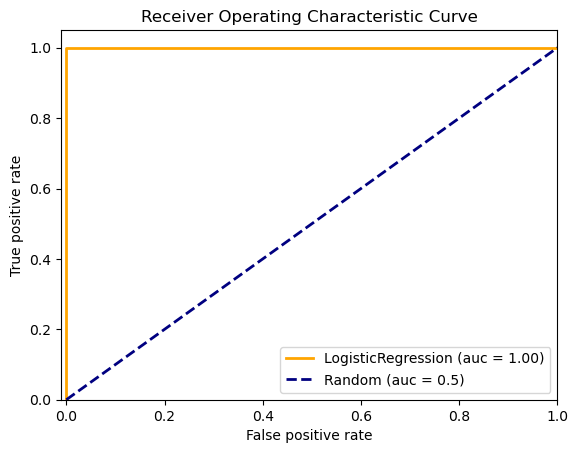

In [47]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val_baseline, y_probas_baseline[:, 1], pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'orange', lw = 2, label = 'LogisticRegression (auc = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random (auc = 0.5)')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = "lower right")
plt.show()

In [48]:
y_pred = lr_baseline.predict(X_val_baseline_scaled)

cm = pd.crosstab(y_pred, y_val_baseline, rownames = ['Predicted Values'], colnames = ['Actual values'])
cm

Actual values,0,1
Predicted Values,,
0,7308,0
1,0,2902


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_val_baseline, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7308
           1       1.00      1.00      1.00      2902

    accuracy                           1.00     10210
   macro avg       1.00      1.00      1.00     10210
weighted avg       1.00      1.00      1.00     10210



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.info())
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [2]:
import sys
#sys.path.append(r'C:\Users\fakep\Documents\S3 ITS\Machine Learning with Python\Simulated-Annealing-Feature-Selection-main\src')
sys.path.append(r'C:\Users\hendr\Documents\S3 ITS\Machine Learning with Python\MachineLearning\Simulated-Annealing-Feature-Selection-main\src')

from main import simulated_annealing


In [6]:
import pandas as pd
import time  
import pandas as pd
import numpy as np
import random
from datetime import datetime as dt
from utils import train_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from GSA_implementation import GSA
from benchmarks import F1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#classifiers_name = "KNN"

#classifiers_name = {
#      "Random Forest": RandomForestClassifier(),
#      "SVM": SVC(),
#      "Decision Tree": DecisionTreeClassifier(),
#      "Logistic Regression": LogisticRegression(),
#      "Naive Bayes": GaussianNB(),
#      "KNN": KNeighborsClassifier(),
#      "Gradient Boosting": GradientBoostingClassifier(),
# }

In [7]:
# Load data
#df = pd.read_csv(r'C:\Users\fakep\Documents\S3 ITS\Machine Learning with Python\Simulated-Annealing-Feature-Selection-main\data\churn2.csv')
#df = pd.read_csv(r'C:\Users\hendr\Documents\S3 ITS\Machine Learning with Python\MachineLearning\Simulated-Annealing-Feature-Selection-main\data\churn2.csv')
# Drop the first column
#df = df.iloc[:, 1:]

#dataset1
# Assuming the target variable is named 'target' and all others are features
#X_train = df.drop(columns=['churn'])
#y_train = df['churn']

#dataset2
X_train = df.drop(columns=['Churn'])
y_train = df['Churn']

print(X_train.head())
print(y_train.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        0           1  0.013889             0   
1       0              0        1           1  0.472222             1   
2       0              0        1           1  0.027778             1   
3       0              0        1           1  0.625000             0   
4       1              0        1           1  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               2             1   
1              1                1               1             2   
2              1                1               1             1   
3              0                1               1             2   
4              1                2               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         2   
1     

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0.013889,0,0,1,2,1,2,2,2,2,2,1,3,0.115423,0.003437,0
1,0,0,1,1,0.472222,1,1,1,1,2,1,2,2,2,1,0,2,0.385075,0.217564,0
2,0,0,1,1,0.027778,1,1,1,1,1,2,2,2,2,2,1,2,0.354229,0.012453,1
3,0,0,1,1,0.625000,0,0,1,1,2,1,1,2,2,1,0,1,0.239303,0.211951,0
4,1,0,1,1,0.027778,1,1,2,2,2,2,2,2,2,2,1,3,0.521891,0.017462,1


In [ ]:
#Mencoba algoritma baru (10-11-2024)

# # Define parameters for GSA and SA
# lb = [0] * X_train.shape[1]
# ub = [1] * X_train.shape[1]
# dim = len(lb)
# PopSize = 30  # Number of particles in GSA
# gsa_iters = 20  # Number of GSA iterations per SA step
# sa_iters =  30 #50  # Total number of SA steps
# max_iters = 50  # Max iterations within each SA refinement
# alpha = 0.93  # Cooling schedule parameter for SA
# convergence_threshold = 0.001  # Threshold for SA early stopping
# num_runs = 10 # Number of independent runs per classifier for robustness





In [ ]:
#mencoba algoritma baru2 (10-11-2024)
import pandas as pd
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from utils import get_classifier

#Define parameters for GSA and SA
lb = [0] * X_train.shape[1]
ub = [1] * X_train.shape[1]
dim = len(lb)
PopSize = 20  # Number of particles in GSA
gsa_iters = 15  # Number of GSA iterations per SA step
sa_iters =  15 #50  # Total number of SA steps
max_iters = 30  # Max iterations within each SA refinement
alpha = 0.93  # Cooling schedule parameter for SA
convergence_threshold = 0.001  # Threshold for SA early stopping
num_runs = 5 # Number of independent runs per classifier for robustness


# Define the classifiers dictionary
# classifiers = {
#     "KNN": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
#     "SVM": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Naive Bayes": GaussianNB(),
#     "Gradient Boosting": GradientBoostingClassifier()
# }

classifiers = {
#    "KNN": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
#     "SVM": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
     "Logistic Regression": LogisticRegression(),
     "Naive Bayes": GaussianNB(),
     "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize DataFrames to store results
all_results = pd.DataFrame()
avg_and_best_results = pd.DataFrame()

# Loop through classifiers
for name, clf in classifiers.items():
    classifier_results = []

    for run in range(1, num_runs + 1):
        print(f"Running Adaptive GSA-SA with {name} (Run {run})...")

        # Run Adaptive GSA-SA for feature selection
        best_solution, results = gsa_sa_iterative(
            X_train, y_train, max_iters=max_iters,
            gsa_iters=gsa_iters, sa_iters=sa_iters,
            alpha=alpha, convergence_threshold=convergence_threshold,
            clf_name=name
        )

        # Convert results to DataFrame
        results_df = pd.DataFrame(results)

        # Add evaluation metrics for each subset of features
        for idx, row in results_df.iterrows():
            subset_features = row["Feature Set"]
            X_train_subset = X_train.iloc[:, subset_features]
            y_pred = clf.fit(X_train_subset, y_train).predict(X_train_subset)

            results_df.loc[idx, "Accuracy"] = accuracy_score(y_train, y_pred)
            results_df.loc[idx, "Precision"] = precision_score(y_train, y_pred)
            results_df.loc[idx, "Recall"] = recall_score(y_train, y_pred)
            results_df.loc[idx, "F1 Score"] = f1_score(y_train, y_pred)
            results_df.loc[idx, "AUC Score"] = roc_auc_score(y_train, clf.predict_proba(X_train_subset)[:, 1])

        # Add columns for classifier and run
        results_df["Classifier"] = name
        results_df["Run"] = run

        # Append results to main DataFrame
        all_results = pd.concat([all_results, results_df], ignore_index=True)

        # Track best metrics
        best_metric = results_df.loc[results_df["Fitness"].idxmin()]
        classifier_results.append(best_metric)

        # Calculate average metrics
        avg_metrics = results_df.mean(numeric_only=True)
        avg_metrics["Classifier"] = name
        avg_metrics["Run"] = run
        avg_metrics["Type"] = "Average"

        # Store best model metrics
        best_metrics = pd.Series(best_metric)
        best_metrics["Classifier"] = name
        best_metrics["Run"] = run
        best_metrics["Type"] = "Best Model"

        # Append to avg_and_best_results
        avg_and_best_results = pd.concat([avg_and_best_results, pd.DataFrame([avg_metrics]), pd.DataFrame([best_metrics])], ignore_index=True)

    # Overall averages and best models
    overall_avg_metrics = avg_and_best_results[(avg_and_best_results["Classifier"] == name) & (avg_and_best_results["Type"] == "Average")].mean(numeric_only=True)
    overall_avg_metrics["Classifier"] = name
    overall_avg_metrics["Run"] = "Overall Average"
    overall_avg_metrics["Type"] = "Average"

    overall_best_metrics = avg_and_best_results[(avg_and_best_results["Classifier"] == name) & (avg_and_best_results["Type"] == "Best Model")].mean(numeric_only=True)
    overall_best_metrics["Classifier"] = name
    overall_best_metrics["Run"] = "Overall Best"
    overall_best_metrics["Type"] = "Best Model"

    avg_and_best_results = pd.concat([avg_and_best_results, pd.DataFrame([overall_avg_metrics]), pd.DataFrame([overall_best_metrics])], ignore_index=True)

# Define classifier names
classifier_names = "_".join(classifiers.keys())  # Combine classifier names into one string    
    
# Save results to CSV
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
all_results.to_csv(f"adaptive_gsa_sa_results_{classifier_names}_{num_runs}runs_{timestamp}.csv", index=False)
avg_and_best_results.to_csv(f"adaptive_gsa_sa_average_best_metrics_{classifier_names}_{num_runs}_{timestamp}.csv", index=False)

print("Results saved successfully.")

Running Adaptive GSA-SA with Logistic Regression (Run 1)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.2690042105263158']
['At iteration 2 the best fitness is 0.2690042105263158']
['At iteration 3 the best fitness is 0.2690042105263158']
['At iteration 4 the best fitness is 0.2690042105263158']
['At iteration 5 the best fitness is 0.2690042105263158']
['At iteration 6 the best fitness is 0.2690042105263158']
['At iteration 7 the best fitness is 0.2690042105263158']
['At iteration 8 the best fitness is 0.2690042105263158']
['At iteration 9 the best fitness is 0.2690042105263158']
['At iteration 10 the best fitness is 0.2690042105263158']
['At iteration 11 the best fitness is 0.2690042105263158']
['At iteration 12 the best fitness is 0.2690042105263158']
['At iteration 13 the best fitness is 0.2690042105263158']
['At iteration 14 the best fitness is 0.2690042105263158']
['At iteration 15 the best fitness is 0.2690042105263158']
Accepted n

Accepted new solution with fitness 0.22742421052631576
Accepted new solution with fitness 0.22894052631578946
Accepted new solution with fitness 0.21362684210526312
Accepted new solution with fitness 0.21362684210526312
Accepted new solution with fitness 0.22154684210526313
Accepted new solution with fitness 0.21514315789473681
Accepted new solution with fitness 0.24775052631578948
Accepted new solution with fitness 0.24332684210526315
Accepted new solution with fitness 0.25718684210526316
Accepted new solution with fitness 0.25375315789473685
Accepted new solution with fitness 0.25375315789473685
Starting SA Iteration 5
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.24629684210526315']
['At iteration 2 the best fitness is 0.24629684210526315']
['At iteration 3 the best fitness is 0.2664978947368421']
['At iteration 4 the best fitness is 0.2664978947368421']
['At iteration 5 the best fitness is 0.2664978947368421']
['At iteration 6 the best fitness is 0.2664978947

Accepted new solution with fitness 0.2689415789473684
Starting SA Iteration 8
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.24815157894736842']
['At iteration 2 the best fitness is 0.2639289473684211']
['At iteration 3 the best fitness is 0.2639289473684211']
['At iteration 4 the best fitness is 0.2639289473684211']
['At iteration 5 the best fitness is 0.2639289473684211']
['At iteration 6 the best fitness is 0.2639289473684211']
['At iteration 7 the best fitness is 0.2639289473684211']
['At iteration 8 the best fitness is 0.2659089473684211']
['At iteration 9 the best fitness is 0.2659089473684211']
['At iteration 10 the best fitness is 0.2659089473684211']
['At iteration 11 the best fitness is 0.2659089473684211']
['At iteration 12 the best fitness is 0.2659089473684211']
['At iteration 13 the best fitness is 0.2659089473684211']
['At iteration 14 the best fitness is 0.2659089473684211']
['At iteration 15 the best fitness is 0.2659089473684211']
Accepted new so

['At iteration 8 the best fitness is 0.2664978947368421']
['At iteration 9 the best fitness is 0.2664978947368421']
['At iteration 10 the best fitness is 0.2664978947368421']
['At iteration 11 the best fitness is 0.2664978947368421']
['At iteration 12 the best fitness is 0.2664978947368421']
['At iteration 13 the best fitness is 0.2664978947368421']
['At iteration 14 the best fitness is 0.2664978947368421']
['At iteration 15 the best fitness is 0.2664978947368421']
Accepted new solution with fitness 0.2660342105263158
Accepted new solution with fitness 0.2664978947368421
Accepted new solution with fitness 0.2664978947368421
Accepted new solution with fitness 0.2664978947368421
Accepted new solution with fitness 0.2664978947368421
Accepted new solution with fitness 0.2660342105263158
Accepted new solution with fitness 0.2660342105263158
Accepted new solution with fitness 0.2660342105263158
Accepted new solution with fitness 0.2660342105263158
Accepted new solution with fitness 0.2660342

Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2501942105263158
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.2501942105263158
Accepted new solution with fitness 0.2605578947368421
Accepted new solution with fitness 0.2600942105263158
Accepted new solution with fitness 0.2595678947368421
Accepted new solution with fitness 0.2595678947368421
Accepted new solution with fitness 0.2595678947368421
Accepted new solution with fitness 0.2541542105263158
Accepted new solution with f

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Running Adaptive GSA-SA with Logistic Regression (Run 2)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.24425421052631577']
['At iteration 2 the best fitness is 0.2526378947368421']
['At iteration 3 the best fitness is 0.2556705263157895']
['At iteration 4 the best fitness is 0.2556705263157895']
['At iteration 5 the best fitness is 0.25817684210526315']
['At iteration 6 the best fitness is 0.25817684210526315']
['At iteration 7 the best fitness is 0.25817684210526315']
['At iteration 8 the best fitness is 0.25817684210526315']
['At iteration 9 the best fitness is 0.25817684210526315']
['At iteration 10 the best fitness is 0.25817684210526315']
['At iteration 11 the best fitness is 0.25817684210526315']
['At iteration 12 the best fitness is 0.25817684210526315']
['At iteration 13 the best fitness is 0.25817684210526315']
['At iteration 14 the best fitness is 0.25817684210526315']
['At iteration 15 the best fitness is 0.25817684210526315'

['At iteration 5 the best fitness is 0.26696157894736844']
['At iteration 6 the best fitness is 0.26696157894736844']
['At iteration 7 the best fitness is 0.26696157894736844']
['At iteration 8 the best fitness is 0.26696157894736844']
['At iteration 9 the best fitness is 0.26696157894736844']
['At iteration 10 the best fitness is 0.26696157894736844']
['At iteration 11 the best fitness is 0.26696157894736844']
['At iteration 12 the best fitness is 0.26696157894736844']
['At iteration 13 the best fitness is 0.26696157894736844']
['At iteration 14 the best fitness is 0.26696157894736844']
['At iteration 15 the best fitness is 0.26696157894736844']
Accepted new solution with fitness 0.25857789473684206
Accepted new solution with fitness 0.25857789473684206
Accepted new solution with fitness 0.25857789473684206
Accepted new solution with fitness 0.26696157894736844
Accepted new solution with fitness 0.26696157894736844
Accepted new solution with fitness 0.2595678947368421
Accepted new sol

Accepted new solution with fitness 0.23924157894736842
Accepted new solution with fitness 0.23924157894736842
Accepted new solution with fitness 0.23924157894736842
Starting SA Iteration 9
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.23587052631578945']
['At iteration 2 the best fitness is 0.2630642105263158']
['At iteration 3 the best fitness is 0.2630642105263158']
['At iteration 4 the best fitness is 0.26498157894736846']
['At iteration 5 the best fitness is 0.26498157894736846']
['At iteration 6 the best fitness is 0.26498157894736846']
['At iteration 7 the best fitness is 0.26498157894736846']
['At iteration 8 the best fitness is 0.26498157894736846']
['At iteration 9 the best fitness is 0.26498157894736846']
['At iteration 10 the best fitness is 0.26498157894736846']
['At iteration 11 the best fitness is 0.26498157894736846']
['At iteration 12 the best fitness is 0.26498157894736846']
['At iteration 13 the best fitness is 0.26498157894736846']
['At iterati

['At iteration 5 the best fitness is 0.2606205263157895']
['At iteration 6 the best fitness is 0.2606205263157895']
['At iteration 7 the best fitness is 0.2606205263157895']
['At iteration 8 the best fitness is 0.2606205263157895']
['At iteration 9 the best fitness is 0.2606205263157895']
['At iteration 10 the best fitness is 0.2606205263157895']
['At iteration 11 the best fitness is 0.2606205263157895']
['At iteration 12 the best fitness is 0.2606205263157895']
['At iteration 13 the best fitness is 0.2606205263157895']
['At iteration 14 the best fitness is 0.2606205263157895']
['At iteration 15 the best fitness is 0.2606205263157895']
Accepted new solution with fitness 0.2600942105263158
Accepted new solution with fitness 0.2536905263157895
Accepted new solution with fitness 0.2566605263157895
Accepted new solution with fitness 0.25817684210526315
Accepted new solution with fitness 0.22702315789473684
Accepted new solution with fitness 0.2600942105263158
Accepted new solution with fit

['At iteration 13 the best fitness is 0.2748815789473684']
['At iteration 14 the best fitness is 0.2748815789473684']
['At iteration 15 the best fitness is 0.2748815789473684']
Accepted new solution with fitness 0.21501789473684207
Accepted new solution with fitness 0.21455421052631576
Accepted new solution with fitness 0.20960421052631575
Accepted new solution with fitness 0.20914052631578944
Accepted new solution with fitness 0.20914052631578944
Accepted new solution with fitness 0.20914052631578944
Accepted new solution with fitness 0.20960421052631575
Accepted new solution with fitness 0.20914052631578944
Accepted new solution with fitness 0.20914052631578944
Accepted new solution with fitness 0.21204789473684207
Accepted new solution with fitness 0.21204789473684207
Accepted new solution with fitness 0.21204789473684207
Accepted new solution with fitness 0.20716052631578943
Accepted new solution with fitness 0.20762421052631574
Accepted new solution with fitness 0.2071605263157894

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Running Adaptive GSA-SA with Logistic Regression (Run 3)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.23930421052631579']
['At iteration 2 the best fitness is 0.25164789473684207']
['At iteration 3 the best fitness is 0.25164789473684207']
['At iteration 4 the best fitness is 0.2580515789473684']
['At iteration 5 the best fitness is 0.2580515789473684']
['At iteration 6 the best fitness is 0.2580515789473684']
['At iteration 7 the best fitness is 0.2580515789473684']
['At iteration 8 the best fitness is 0.2580515789473684']
['At iteration 9 the best fitness is 0.2580515789473684']
['At iteration 10 the best fitness is 0.2580515789473684']
['At iteration 11 the best fitness is 0.2580515789473684']
['At iteration 12 the best fitness is 0.2580515789473684']
['At iteration 13 the best fitness is 0.2580515789473684']
['At iteration 14 the best fitness is 0.2580515789473684']
['At iteration 15 the best fitness is 0.2580515789473684']
Accepte

['At iteration 9 the best fitness is 0.27138526315789474']
['At iteration 10 the best fitness is 0.27138526315789474']
['At iteration 11 the best fitness is 0.27138526315789474']
['At iteration 12 the best fitness is 0.27138526315789474']
['At iteration 13 the best fitness is 0.27138526315789474']
['At iteration 14 the best fitness is 0.27138526315789474']
['At iteration 15 the best fitness is 0.27138526315789474']
Accepted new solution with fitness 0.27138526315789474
Accepted new solution with fitness 0.27138526315789474
Accepted new solution with fitness 0.20907789473684207
No significant improvement. Stopping SA Inner Iteration 3.
Starting SA Iteration 7
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.24035684210526315']
['At iteration 2 the best fitness is 0.25758789473684207']
['At iteration 3 the best fitness is 0.25758789473684207']
['At iteration 4 the best fitness is 0.2645178947368421']
['At iteration 5 the best fitness is 0.2645178947368421']
['At itera

Accepted new solution with fitness 0.2579889473684211
Accepted new solution with fitness 0.2579889473684211
Accepted new solution with fitness 0.2589789473684211
Starting SA Iteration 10
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.2571242105263158']
['At iteration 2 the best fitness is 0.26788894736842106']
['At iteration 3 the best fitness is 0.26788894736842106']
['At iteration 4 the best fitness is 0.2704578947368421']
['At iteration 5 the best fitness is 0.2704578947368421']
['At iteration 6 the best fitness is 0.2704578947368421']
['At iteration 7 the best fitness is 0.2704578947368421']
['At iteration 8 the best fitness is 0.2704578947368421']
['At iteration 9 the best fitness is 0.2704578947368421']
['At iteration 10 the best fitness is 0.2704578947368421']
['At iteration 11 the best fitness is 0.2704578947368421']
['At iteration 12 the best fitness is 0.2704578947368421']
['At iteration 13 the best fitness is 0.2704578947368421']
['At iteration 14 the b

Accepted new solution with fitness 0.2630015789473684
Accepted new solution with fitness 0.2630015789473684
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.26445526315789475
Accepted new solution with fitness 0.2630015789473684
Accepted new solution with fitness 0.26445526315789475
Starting SA Iteration 14
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.2581142105263158']
['At iteration 2 the best fitness is 0.2581142105263158']
['At iteration 3 the best fitness is 0.2581142105263158']
['At iteration 4 the best fitness is 0.2616731578947369']
['At iteration 5 the best fitness is 0.2616731578947369']
['At iteration 6 the best fitness is 0.26167315789473

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Running Adaptive GSA-SA with Logistic Regression (Run 4)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.24181052631578945']
['At iteration 2 the best fitness is 0.26498157894736846']
['At iteration 3 the best fitness is 0.26498157894736846']
['At iteration 4 the best fitness is 0.26498157894736846']
['At iteration 5 the best fitness is 0.2684778947368421']
['At iteration 6 the best fitness is 0.2684778947368421']
['At iteration 7 the best fitness is 0.2684778947368421']
['At iteration 8 the best fitness is 0.2684778947368421']
['At iteration 9 the best fitness is 0.2684778947368421']
['At iteration 10 the best fitness is 0.2684778947368421']
['At iteration 11 the best fitness is 0.2684778947368421']
['At iteration 12 the best fitness is 0.2684778947368421']
['At iteration 13 the best fitness is 0.2684778947368421']
['At iteration 14 the best fitness is 0.2684778947368421']
['At iteration 15 the best fitness is 0.2684778947368421']
Accept

['At iteration 2 the best fitness is 0.2664978947368421']
['At iteration 3 the best fitness is 0.2664978947368421']
['At iteration 4 the best fitness is 0.2664978947368421']
['At iteration 5 the best fitness is 0.2674252631578947']
['At iteration 6 the best fitness is 0.2674252631578947']
['At iteration 7 the best fitness is 0.2674252631578947']
['At iteration 8 the best fitness is 0.2674252631578947']
['At iteration 9 the best fitness is 0.2674252631578947']
['At iteration 10 the best fitness is 0.2674252631578947']
['At iteration 11 the best fitness is 0.2674252631578947']
['At iteration 12 the best fitness is 0.2674252631578947']
['At iteration 13 the best fitness is 0.2674252631578947']
['At iteration 14 the best fitness is 0.2674252631578947']
['At iteration 15 the best fitness is 0.2674252631578947']
Accepted new solution with fitness 0.2674252631578947
Accepted new solution with fitness 0.2674252631578947
Accepted new solution with fitness 0.2674252631578947
Accepted new solutio

Accepted new solution with fitness 0.24874052631578947
Accepted new solution with fitness 0.24874052631578947
Accepted new solution with fitness 0.2551442105263158
Accepted new solution with fitness 0.2615478947368421
Accepted new solution with fitness 0.21706052631578943
Accepted new solution with fitness 0.24181052631578945
Accepted new solution with fitness 0.20768684210526311
No significant improvement. Stopping SA Inner Iteration 26.
Starting SA Iteration 10
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.23936684210526313']
['At iteration 2 the best fitness is 0.2680142105263158']
['At iteration 3 the best fitness is 0.2680142105263158']
['At iteration 4 the best fitness is 0.2680142105263158']
['At iteration 5 the best fitness is 0.2680142105263158']
['At iteration 6 the best fitness is 0.2680142105263158']
['At iteration 7 the best fitness is 0.2680142105263158']
['At iteration 8 the best fitness is 0.2694678947368421']
['At iteration 9 the best fitness is 

['At iteration 1 the best fitness is 0.24530684210526313']
['At iteration 2 the best fitness is 0.24914157894736844']
['At iteration 3 the best fitness is 0.2626631578947369']
['At iteration 4 the best fitness is 0.2626631578947369']
['At iteration 5 the best fitness is 0.2626631578947369']
['At iteration 6 the best fitness is 0.2626631578947369']
['At iteration 7 the best fitness is 0.2626631578947369']
['At iteration 8 the best fitness is 0.2626631578947369']
['At iteration 9 the best fitness is 0.2626631578947369']
['At iteration 10 the best fitness is 0.2626631578947369']
['At iteration 11 the best fitness is 0.2626631578947369']
['At iteration 12 the best fitness is 0.2626631578947369']
['At iteration 13 the best fitness is 0.2626631578947369']
['At iteration 14 the best fitness is 0.2626631578947369']
['At iteration 15 the best fitness is 0.2626631578947369']
Accepted new solution with fitness 0.24583315789473684
Accepted new solution with fitness 0.2626631578947369
Accepted new 

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Running Adaptive GSA-SA with Logistic Regression (Run 5)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.25619684210526317']
['At iteration 2 the best fitness is 0.26993157894736847']
['At iteration 3 the best fitness is 0.26993157894736847']
['At iteration 4 the best fitness is 0.26993157894736847']
['At iteration 5 the best fitness is 0.26993157894736847']
['At iteration 6 the best fitness is 0.2709842105263158']
['At iteration 7 the best fitness is 0.2709842105263158']
['At iteration 8 the best fitness is 0.2709842105263158']
['At iteration 9 the best fitness is 0.2709842105263158']
['At iteration 10 the best fitness is 0.2709842105263158']
['At iteration 11 the best fitness is 0.2709842105263158']
['At iteration 12 the best fitness is 0.2709842105263158']
['At iteration 13 the best fitness is 0.2709842105263158']
['At iteration 14 the best fitness is 0.2709842105263158']
['At iteration 15 the best fitness is 0.2709842105263158']
Accep

Accepted new solution with fitness 0.24419157894736843
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.22346421052631577
Accepted new solution with fitness 0.2249178947368421
Accepted new solution with fitness 0.22346421052631577
Accepted new solution with fitness 0.22346421052631577
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.22346421052631577
Accepted new solution with fitness 0.22346421052631577
Accepted new solution 

Accepted new solution with fitness 0.2472242105263158
Accepted new solution with fitness 0.23540684210526314
Accepted new solution with fitness 0.2472242105263158
Accepted new solution with fitness 0.24425421052631577
Accepted new solution with fitness 0.24669789473684212
Accepted new solution with fitness 0.24669789473684212
Accepted new solution with fitness 0.26696157894736844
Accepted new solution with fitness 0.2486778947368421
Accepted new solution with fitness 0.21653421052631575
No significant improvement. Stopping SA Inner Iteration 28.
Starting SA Iteration 9
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.2532894736842105']
['At iteration 2 the best fitness is 0.2561342105263158']
['At iteration 3 the best fitness is 0.2600942105263158']
['At iteration 4 the best fitness is 0.2600942105263158']
['At iteration 5 the best fitness is 0.2600942105263158']
['At iteration 6 the best fitness is 0.2600942105263158']
['At iteration 7 the best fitness is 0.2600942

Accepted new solution with fitness 0.2580515789473684
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2580515789473684
Accepted new solution with fitness 0.2580515789473684
Accepted new solution with fitness 0.2546178947368421
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2437278947368421
Accepted new solution with fitness 0.2452442105263158
Accepted new solution with f

Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.25164789473684207
Accepted new solution with fitness 0.23534421052631577
Best solution found: [0.9271698  0.9511226  0.19718387 0.11475081 0.02431527 1.
 1.         0.10997372 0.02257951 0.07232133 0.64818506 0.24048146
 0.96859731 0.94373979 0.36885777 0.25036543 1.         0.5502013
 0.51258387] with fitness: 0.21316315789473683


C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hendr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Running Adaptive GSA-SA with Naive Bayes (Run 1)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.30238842105263164']
['At iteration 2 the best fitness is 0.3488557894736842']
['At iteration 3 the best fitness is 0.3488557894736842']
['At iteration 4 the best fitness is 0.3488557894736842']
['At iteration 5 the best fitness is 0.3488557894736842']
['At iteration 6 the best fitness is 0.3701094736842105']
['At iteration 7 the best fitness is 0.3701094736842105']
['At iteration 8 the best fitness is 0.3701094736842105']
['At iteration 9 the best fitness is 0.3701094736842105']
['At iteration 10 the best fitness is 0.3701094736842105']
['At iteration 11 the best fitness is 0.3701094736842105']
['At iteration 12 the best fitness is 0.3701094736842105']
['At iteration 13 the best fitness is 0.3701094736842105']
['At iteration 14 the best fitness is 0.3701094736842105']
['At iteration 15 the best fitness is 0.3701094736842105']
Accepted new solu

Accepted new solution with fitness 0.37895684210526315
Accepted new solution with fitness 0.37895684210526315
Accepted new solution with fitness 0.35473315789473686
Accepted new solution with fitness 0.37895684210526315
Accepted new solution with fitness 0.35473315789473686
Accepted new solution with fitness 0.35473315789473686
Accepted new solution with fitness 0.35473315789473686
Accepted new solution with fitness 0.3552594736842105
Accepted new solution with fitness 0.35473315789473686
Accepted new solution with fitness 0.3408731578947368
Accepted new solution with fitness 0.3408731578947368
Accepted new solution with fitness 0.34331684210526314
Accepted new solution with fitness 0.34331684210526314
Starting SA Iteration 8
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.32048421052631576']
['At iteration 2 the best fitness is 0.34984578947368417']
['At iteration 3 the best fitness is 0.34984578947368417']
['At iteration 4 the best fitness is 0.36305421052631576'

['At iteration 6 the best fitness is 0.3774405263157895']
['At iteration 7 the best fitness is 0.3774405263157895']
['At iteration 8 the best fitness is 0.3774405263157895']
['At iteration 9 the best fitness is 0.3774405263157895']
['At iteration 10 the best fitness is 0.3774405263157895']
['At iteration 11 the best fitness is 0.3774405263157895']
['At iteration 12 the best fitness is 0.3774405263157895']
['At iteration 13 the best fitness is 0.3774405263157895']
['At iteration 14 the best fitness is 0.3774405263157895']
['At iteration 15 the best fitness is 0.3774405263157895']
Accepted new solution with fitness 0.3640442105263158
Accepted new solution with fitness 0.3640442105263158
Accepted new solution with fitness 0.3774405263157895
Accepted new solution with fitness 0.3640442105263158
Accepted new solution with fitness 0.3640442105263158
Accepted new solution with fitness 0.3640442105263158
Accepted new solution with fitness 0.3675405263157895
Accepted new solution with fitness 0

['At iteration 15 the best fitness is 0.3745957894736842']
Accepted new solution with fitness 0.32265210526315785
Accepted new solution with fitness 0.31822842105263155
Accepted new solution with fitness 0.31822842105263155
Accepted new solution with fitness 0.31822842105263155
Accepted new solution with fitness 0.31822842105263155
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.32212578947368414
Accepted new solution with fitness 0.32212578947368414
Accepted new solution with fitness 0.32212578947368414
Accepted new solution with fitness 0.31822842105263155
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.3177021052631579
Accepted new solution with fitness 0.31822842105263155
Accepted new 

Accepted new solution with fitness 0.3419257894736842
Accepted new solution with fitness 0.3315621052631579
Accepted new solution with fitness 0.33842947368421045
Accepted new solution with fitness 0.33842947368421045
Accepted new solution with fitness 0.33842947368421045
Accepted new solution with fitness 0.31618578947368414
No significant improvement. Stopping SA Inner Iteration 17.
Starting SA Iteration 5
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.33988315789473683']
['At iteration 2 the best fitness is 0.3625905263157895']
['At iteration 3 the best fitness is 0.3625905263157895']
['At iteration 4 the best fitness is 0.3839694736842105']
['At iteration 5 the best fitness is 0.3839694736842105']
['At iteration 6 the best fitness is 0.3839694736842105']
['At iteration 7 the best fitness is 0.3839694736842105']
['At iteration 8 the best fitness is 0.3839694736842105']
['At iteration 9 the best fitness is 0.3839694736842105']
['At iteration 10 the best fitness 

['At iteration 6 the best fitness is 0.3437805263157895']
['At iteration 7 the best fitness is 0.3437805263157895']
['At iteration 8 the best fitness is 0.3437805263157895']
['At iteration 9 the best fitness is 0.3437805263157895']
['At iteration 10 the best fitness is 0.3437805263157895']
['At iteration 11 the best fitness is 0.3437805263157895']
['At iteration 12 the best fitness is 0.3437805263157895']
['At iteration 13 the best fitness is 0.3437805263157895']
['At iteration 14 the best fitness is 0.3437805263157895']
['At iteration 15 the best fitness is 0.3437805263157895']
Accepted new solution with fitness 0.3437805263157895
Accepted new solution with fitness 0.3437805263157895
Accepted new solution with fitness 0.3437805263157895
Accepted new solution with fitness 0.3437805263157895
Accepted new solution with fitness 0.316987894736842
Accepted new solution with fitness 0.316987894736842
Accepted new solution with fitness 0.316987894736842
Accepted new solution with fitness 0.31

Accepted new solution with fitness 0.31705052631578945
Accepted new solution with fitness 0.32345421052631573
Accepted new solution with fitness 0.31705052631578945
Accepted new solution with fitness 0.31705052631578945
Starting SA Iteration 13
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3205468421052631']
['At iteration 2 the best fitness is 0.34127421052631574']
['At iteration 3 the best fitness is 0.34127421052631574']
['At iteration 4 the best fitness is 0.3705105263157895']
['At iteration 5 the best fitness is 0.3705105263157895']
['At iteration 6 the best fitness is 0.3705105263157895']
['At iteration 7 the best fitness is 0.3705105263157895']
['At iteration 8 the best fitness is 0.37994684210526314']
['At iteration 9 the best fitness is 0.37994684210526314']
['At iteration 10 the best fitness is 0.37994684210526314']
['At iteration 11 the best fitness is 0.37994684210526314']
['At iteration 12 the best fitness is 0.37994684210526314']
['At iteration 13 t

['At iteration 1 the best fitness is 0.3136168421052632']
['At iteration 2 the best fitness is 0.31804052631578944']
['At iteration 3 the best fitness is 0.32060947368421044']
['At iteration 4 the best fitness is 0.32060947368421044']
['At iteration 5 the best fitness is 0.32206315789473683']
['At iteration 6 the best fitness is 0.32206315789473683']
['At iteration 7 the best fitness is 0.33248947368421045']
['At iteration 8 the best fitness is 0.33248947368421045']
['At iteration 9 the best fitness is 0.33248947368421045']
['At iteration 10 the best fitness is 0.33248947368421045']
['At iteration 11 the best fitness is 0.33248947368421045']
['At iteration 12 the best fitness is 0.33248947368421045']
['At iteration 13 the best fitness is 0.33248947368421045']
['At iteration 14 the best fitness is 0.33248947368421045']
['At iteration 15 the best fitness is 0.33248947368421045']
Accepted new solution with fitness 0.30476947368421053
No significant improvement. Stopping SA Inner Iteration

Accepted new solution with fitness 0.30377947368421054
No significant improvement. Stopping SA Inner Iteration 3.
Starting SA Iteration 6
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3215368421052631']
['At iteration 2 the best fitness is 0.3294568421052631']
['At iteration 3 the best fitness is 0.3294568421052631']
['At iteration 4 the best fitness is 0.3472768421052631']
['At iteration 5 the best fitness is 0.3472768421052631']
['At iteration 6 the best fitness is 0.3472768421052631']
['At iteration 7 the best fitness is 0.3472768421052631']
['At iteration 8 the best fitness is 0.3472768421052631']
['At iteration 9 the best fitness is 0.3472768421052631']
['At iteration 10 the best fitness is 0.3472768421052631']
['At iteration 11 the best fitness is 0.3472768421052631']
['At iteration 12 the best fitness is 0.3472768421052631']
['At iteration 13 the best fitness is 0.3472768421052631']
['At iteration 14 the best fitness is 0.3472768421052631']
['At iteration 

Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.33149947368421046
Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.30476947368421053
Accepted new solution with fitness 0.30476947368421053
Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.3062857894736843
Accepted new solution with fitness 0.33149947368421046
Accepted new solution with fitness 0.3299831578947368
Accepted new solution with fitness 0.3299831578947368
Accepted new solution with fitness 0.3299831578947368
Accepted new solution with fitness 0.3299831578947368
Accepted new solution with fitness 0.33149947368421046
Accepted new solution with fitness 0.33149947368421046
Accepted new solution with fitness 0.3299831578947368
Accepted new solution with fitness 0.3299831578947368
Accepted new solution 

Accepted new solution with fitness 0.33295315789473684
Accepted new solution with fitness 0.33295315789473684
Accepted new solution with fitness 0.3121631578947369
Accepted new solution with fitness 0.3344694736842105
Accepted new solution with fitness 0.3121631578947369
Accepted new solution with fitness 0.29876684210526316
Accepted new solution with fitness 0.29876684210526316
Starting SA Iteration 13
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3236421052631579']
['At iteration 2 the best fitness is 0.3236421052631579']
['At iteration 3 the best fitness is 0.3295194736842105']
['At iteration 4 the best fitness is 0.34390578947368416']
['At iteration 5 the best fitness is 0.34390578947368416']
['At iteration 6 the best fitness is 0.34390578947368416']
['At iteration 7 the best fitness is 0.34390578947368416']
['At iteration 8 the best fitness is 0.34390578947368416']
['At iteration 9 the best fitness is 0.34390578947368416']
['At iteration 10 the best fitness 

Running Adaptive GSA-SA with Naive Bayes (Run 4)...
Starting SA Iteration 1
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3536805263157895']
['At iteration 2 the best fitness is 0.36509684210526316']
['At iteration 3 the best fitness is 0.3685305263157895']
['At iteration 4 the best fitness is 0.3819268421052632']
['At iteration 5 the best fitness is 0.3819268421052632']
['At iteration 6 the best fitness is 0.3819268421052632']
['At iteration 7 the best fitness is 0.3819268421052632']
['At iteration 8 the best fitness is 0.3819268421052632']
['At iteration 9 the best fitness is 0.3819268421052632']
['At iteration 10 the best fitness is 0.3819268421052632']
['At iteration 11 the best fitness is 0.3819268421052632']
['At iteration 12 the best fitness is 0.3819268421052632']
['At iteration 13 the best fitness is 0.3819268421052632']
['At iteration 14 the best fitness is 0.3819268421052632']
['At iteration 15 the best fitness is 0.3819268421052632']
Accepted new solu

Accepted new solution with fitness 0.3581668421052631
Accepted new solution with fitness 0.33137421052631577
Accepted new solution with fitness 0.3101831578947369
No significant improvement. Stopping SA Inner Iteration 23.
Starting SA Iteration 7
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.32840421052631574']
['At iteration 2 the best fitness is 0.33975789473684204']
['At iteration 3 the best fitness is 0.33975789473684204']
['At iteration 4 the best fitness is 0.33975789473684204']
['At iteration 5 the best fitness is 0.35216421052631575']
['At iteration 6 the best fitness is 0.36800421052631577']
['At iteration 7 the best fitness is 0.36800421052631577']
['At iteration 8 the best fitness is 0.36800421052631577']
['At iteration 9 the best fitness is 0.36800421052631577']
['At iteration 10 the best fitness is 0.36800421052631577']
['At iteration 11 the best fitness is 0.36800421052631577']
['At iteration 12 the best fitness is 0.36800421052631577']
['At iterati

Accepted new solution with fitness 0.29783947368421054
Starting SA Iteration 11
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3303842105263157']
['At iteration 2 the best fitness is 0.34028421052631574']
['At iteration 3 the best fitness is 0.35170052631578946']
['At iteration 4 the best fitness is 0.37400684210526314']
['At iteration 5 the best fitness is 0.37400684210526314']
['At iteration 6 the best fitness is 0.3784305263157895']
['At iteration 7 the best fitness is 0.3784305263157895']
['At iteration 8 the best fitness is 0.3784305263157895']
['At iteration 9 the best fitness is 0.3784305263157895']
['At iteration 10 the best fitness is 0.3784305263157895']
['At iteration 11 the best fitness is 0.3784305263157895']
['At iteration 12 the best fitness is 0.3784305263157895']
['At iteration 13 the best fitness is 0.3784305263157895']
['At iteration 14 the best fitness is 0.3784305263157895']
['At iteration 15 the best fitness is 0.3784305263157895']
Accepted n

['At iteration 8 the best fitness is 0.3463494736842105']
['At iteration 9 the best fitness is 0.3463494736842105']
['At iteration 10 the best fitness is 0.3463494736842105']
['At iteration 11 the best fitness is 0.3463494736842105']
['At iteration 12 the best fitness is 0.3463494736842105']
['At iteration 13 the best fitness is 0.3463494736842105']
['At iteration 14 the best fitness is 0.3463494736842105']
['At iteration 15 the best fitness is 0.3463494736842105']
Accepted new solution with fitness 0.3345321052631579
Accepted new solution with fitness 0.33301578947368415
Accepted new solution with fitness 0.33301578947368415
Accepted new solution with fitness 0.3345321052631579
Accepted new solution with fitness 0.3246321052631579
Accepted new solution with fitness 0.3246321052631579
Accepted new solution with fitness 0.3246321052631579
Accepted new solution with fitness 0.3246321052631579
Accepted new solution with fitness 0.3116994736842106
Accepted new solution with fitness 0.31169

Accepted new solution with fitness 0.36846789473684205
Accepted new solution with fitness 0.36398157894736843
Accepted new solution with fitness 0.36846789473684205
Accepted new solution with fitness 0.36846789473684205
Accepted new solution with fitness 0.3808742105263158
Accepted new solution with fitness 0.3808742105263158
Accepted new solution with fitness 0.3654978947368421
Accepted new solution with fitness 0.29969421052631584
No significant improvement. Stopping SA Inner Iteration 10.
Starting SA Iteration 4
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.34832947368421047']
['At iteration 2 the best fitness is 0.3671394736842105']
['At iteration 3 the best fitness is 0.3671394736842105']
['At iteration 4 the best fitness is 0.3671394736842105']
['At iteration 5 the best fitness is 0.3671394736842105']
['At iteration 6 the best fitness is 0.3671394736842105']
['At iteration 7 the best fitness is 0.3671394736842105']
['At iteration 8 the best fitness is 0.386

Accepted new solution with fitness 0.3532168421052631
Starting SA Iteration 7
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.3151331578947368']
['At iteration 2 the best fitness is 0.35519684210526314']
['At iteration 3 the best fitness is 0.35519684210526314']
['At iteration 4 the best fitness is 0.35519684210526314']
['At iteration 5 the best fitness is 0.35519684210526314']
['At iteration 6 the best fitness is 0.35519684210526314']
['At iteration 7 the best fitness is 0.35519684210526314']
['At iteration 8 the best fitness is 0.35519684210526314']
['At iteration 9 the best fitness is 0.35519684210526314']
['At iteration 10 the best fitness is 0.35519684210526314']
['At iteration 11 the best fitness is 0.35519684210526314']
['At iteration 12 the best fitness is 0.35519684210526314']
['At iteration 13 the best fitness is 0.35519684210526314']
['At iteration 14 the best fitness is 0.35519684210526314']
['At iteration 15 the best fitness is 0.35519684210526314']
Ac

['At iteration 8 the best fitness is 0.37796684210526316']
['At iteration 9 the best fitness is 0.37796684210526316']
['At iteration 10 the best fitness is 0.38687684210526313']
['At iteration 11 the best fitness is 0.38687684210526313']
['At iteration 12 the best fitness is 0.38687684210526313']
['At iteration 13 the best fitness is 0.38687684210526313']
['At iteration 14 the best fitness is 0.38687684210526313']
['At iteration 15 the best fitness is 0.38687684210526313']
Accepted new solution with fitness 0.38687684210526313
Accepted new solution with fitness 0.38687684210526313
Accepted new solution with fitness 0.38146315789473684
Accepted new solution with fitness 0.38687684210526313
Accepted new solution with fitness 0.3691194736842105
Accepted new solution with fitness 0.3691194736842105
Accepted new solution with fitness 0.3839694736842105
Accepted new solution with fitness 0.3631794736842105
Accepted new solution with fitness 0.3721521052631579
Accepted new solution with fitne

Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.32992052631578944
Accepted new solution with fitness 0.32992052631578944
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3472768421052631
Accepted new solution with fitness 0.3151331578947368
Accepted new solution with

['At iteration 7 the best fitness is 0.2675505263157895']
['At iteration 8 the best fitness is 0.2675505263157895']
['At iteration 9 the best fitness is 0.2675505263157895']
['At iteration 10 the best fitness is 0.2675505263157895']
['At iteration 11 the best fitness is 0.2675505263157895']
['At iteration 12 the best fitness is 0.2675505263157895']
['At iteration 13 the best fitness is 0.2675505263157895']
['At iteration 14 the best fitness is 0.2675505263157895']
['At iteration 15 the best fitness is 0.2675505263157895']
Accepted new solution with fitness 0.2675505263157895
Accepted new solution with fitness 0.24979315789473686
Accepted new solution with fitness 0.24926684210526315
No significant improvement. Stopping SA Inner Iteration 3.
Starting SA Iteration 3
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.26795157894736843']
['At iteration 2 the best fitness is 0.26795157894736843']
['At iteration 3 the best fitness is 0.26795157894736843']
['At iteration 4 t

['At iteration 9 the best fitness is 0.2606205263157895']
['At iteration 10 the best fitness is 0.2606205263157895']
['At iteration 11 the best fitness is 0.2606205263157895']
['At iteration 12 the best fitness is 0.2606205263157895']
['At iteration 13 the best fitness is 0.2606205263157895']
['At iteration 14 the best fitness is 0.2606205263157895']
['At iteration 15 the best fitness is 0.2606205263157895']
Accepted new solution with fitness 0.2146168421052631
No significant improvement. Stopping SA Inner Iteration 1.
Starting SA Iteration 8
GSA is optimizing  "<lambda>"
['At iteration 1 the best fitness is 0.2546805263157895']
['At iteration 2 the best fitness is 0.2546805263157895']
['At iteration 3 the best fitness is 0.2639289473684211']
['At iteration 4 the best fitness is 0.26544526315789474']
['At iteration 5 the best fitness is 0.26544526315789474']
['At iteration 6 the best fitness is 0.26544526315789474']
['At iteration 7 the best fitness is 0.26544526315789474']
['At iterat

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

# Define the classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize an empty DataFrame to store all results
all_results = pd.DataFrame()

# Initialize an empty DataFrame to store average and best metrics for each run
avg_and_best_results = pd.DataFrame()

# Number of runs
num_runs = 10

# Define parameters for GSA and SA
lb = [0] * X_train.shape[1]
ub = [1] * X_train.shape[1]
dim = len(lb)
PopSize = 30
iters = 100

# Generate a timestamp for dynamic file names
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Get classifier names for the file name
classifier_names = "_".join(classifiers.keys())

# Loop through each classifier
for name, clf in classifiers.items():
    classifier_results = []
    
    for run in range(1, num_runs + 1):
        #print(f"Running FS-SA with {name} (Run {run})...")
        print(f"Running FS-GSA_SA with {name} (Run {run})...")
        
        # Run the simulated annealing process with the current classifier
        #results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train, classifier_name=name, run_index=run)
        
        # Run GSA to get the best solution
        gsa_solution = GSA(objf=F1, lb=lb, ub=ub, dim=dim, PopSize=PopSize, iters=iters, df=df)
        initial_solution = gsa_solution.gBest

        # Run Simulated Annealing with the initial solution from GSA
        results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train, classifier_name = name, run_index = run, initial_solution=initial_solution)
        
        # Add columns for the classifier name and run number
        results['Classifier'] = name
        results['Run'] = run
        
        # Append the results to the combined DataFrame
        all_results = pd.concat([all_results, results], ignore_index=True)
        
        # Store the best metric from this run
        classifier_results.append(best_metric)
        
        # Calculate the average metrics for this run
        avg_metrics = results.mean()
        avg_metrics['Classifier'] = name
        avg_metrics['Run'] = run
        avg_metrics['Type'] = 'Average'

        # Store the best model's metrics
        best_metrics = pd.Series(best_metric)
        best_metrics['Classifier'] = name
        best_metrics['Run'] = run
        best_metrics['Type'] = 'Best Model'

        # Append to the DataFrame
        avg_and_best_results = pd.concat([avg_and_best_results, pd.DataFrame([avg_metrics]), pd.DataFrame([best_metrics])], ignore_index=True)

    # Calculate overall averages across all runs for this classifier
    overall_avg_metrics = avg_and_best_results[(avg_and_best_results['Classifier'] == name) & (avg_and_best_results['Type'] == 'Average')].mean(numeric_only=True)
    overall_avg_metrics['Classifier'] = name
    overall_avg_metrics['Run'] = 'Overall Average'
    overall_avg_metrics['Type'] = 'Average'

    overall_best_metrics = avg_and_best_results[(avg_and_best_results['Classifier'] == name) & (avg_and_best_results['Type'] == 'Best Model')].mean(numeric_only=True)
    overall_best_metrics['Classifier'] = name
    overall_best_metrics['Run'] = 'Overall Best'
    overall_best_metrics['Type'] = 'Best Model'

    # Append overall averages to the DataFrame
    avg_and_best_results = pd.concat([avg_and_best_results, pd.DataFrame([overall_avg_metrics]), pd.DataFrame([overall_best_metrics])], ignore_index=True)

# Dynamic file names
output_csv = f'fs_sa_results_{classifier_names}_{num_runs}runs_{timestamp}.csv'
average_output_csv = f'fs_sa_average_best_metrics_{classifier_names}_{num_runs}runs_{timestamp}.csv'

# Save the combined results to a CSV file
all_results.to_csv(output_csv, index=False)

# Save the average and best metrics to another CSV file
avg_and_best_results.to_csv(average_output_csv, index=False)

print(f"Detailed results saved to {output_csv}")
print(f"Average and best metrics saved to {average_output_csv}")


In [ ]:
results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train, classifier_name ="KNN")

In [ ]:
# Define parameters for GSA and SA
lb = [0] * X_train.shape[1]
ub = [1] * X_train.shape[1]
dim = len(lb)
PopSize = 30
iters = 100

# Run GSA to get the best solution
gsa_solution = GSA(objf=F1, lb=lb, ub=ub, dim=dim, PopSize=PopSize, iters=iters, df=df)
initial_solution = gsa_solution.gBest

# Run Simulated Annealing with the initial solution from GSA
results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train, initial_solution=initial_solution)


In [ ]:
results

In [ ]:
best_metric

In [ ]:
best_subset_cols

In [ ]:
# Multiple Runs for Robustness Testing
num_runs = 10  # Number of runs
run_times = []
all_metrics = []
selected_features_count = []


classifier_name = "KNN"
fitness_function = "accuracy"


for run in range(num_runs):
    print(f"Starting Run {run + 1}")
    
    # Start the timer for the run
    start_time = time.time()
    
    # Run the simulated annealing process
    results, best_metric, best_subset_cols = simulated_annealing(X_train, y_train, classifier_name, fitness_function, run_index=run+1)
    
    # End the timer for the run
    end_time = time.time()
    
    # Calculate the run time and store it
    run_time = end_time - start_time
    run_times.append(run_time)
    
    print(f"Run {run + 1} completed in {run_time:.2f} seconds")
    
    
    #store the best metric from this run
    all_metrics.append(best_metric)
    # Optionally store the results
    # all_results.append((results, best_metric, best_subset_cols))
    
    # Store the number of features selected in this run
    selected_features_count.append(len(best_subset_cols))
    

# After all runs are complete
mean_runtime = np.mean(run_times)
std_runtime = np.std(run_times)

print(f"Average run time over {num_runs} runs: {mean_runtime:.2f} seconds")
print(f"Standard deviation of run time: {std_runtime:.2f} seconds")

# Calculate average and standard deviation of each metric
avg_metrics = {key: np.mean([metric[key] for metric in all_metrics]) for key in all_metrics[0]}
std_metrics = {key: np.std([metric[key] for metric in all_metrics]) for key in all_metrics[0]}

# Display average and standard deviation of metrics
print("\nAverage Metrics over all runs:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.3f}")

print("\nStandard Deviation of Metrics over all runs:")
for metric, value in std_metrics.items():
    print(f"{metric}: {value:.3f}")

# Display the best metrics for each run
print("\nBest Metrics from each run:")
for run_index, metrics in enumerate(all_metrics):
    print(f"Run {run_index + 1}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")

# Calculate and display the average number of features selected
average_features_selected = np.mean(selected_features_count)
print(f"\nAverage number of features selected over {num_runs} runs: {average_features_selected:.2f}")


In [ ]:
results